In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
import warnings
warnings.filterwarnings(action='ignore')  


In [5]:
df_train = pd.read_csv("./data/FIFA_train.csv")
df_test = pd.read_csv("./data/FIFA_test.csv")
submission = pd.read_csv('./data/submission.csv')
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [6]:
df_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


## 데이터 전처리

### 남은 계약 기간

In [7]:
def contract_clean(in_str):
    if len(in_str) > 5:
        mon_str, year = in_str.split(", ")
        month, day = mon_str.split()
        year = int(year)
        if month == 'Jan':
            mon = 1 / 12
            year += mon
        elif month == "May":
            mon = 5 / 12
            year += mon
        elif month == "Jun":
            mon = 6 / 12
            year += mon
        elif month == "Dec":
            mon = 12 / 12
            year += mon
        return year
    else:
        year = int(in_str[-4:])
        return year


df_train['contract_until'] = df_train['contract_until'].apply(contract_clean)
df_test['contract_until'] = df_test['contract_until'].apply(contract_clean)

In [8]:
df_train['contract_until'] = df_train['contract_until']-2018
df_test['contract_until'] = df_test['contract_until']-2018

### 유럽: 1 나머지: 0

In [9]:
def pickEuro(string):
    if string == "europe":
        return 1
    else:
        return 0


df_train['euro'] = df_train['continent'].apply(pickEuro)
df_test['euro'] = df_test['continent'].apply(pickEuro)
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,110500000.0,0
1,3,De Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,72000000.0,1
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0,0
3,8,Sergio Ramos,32,europe,2.0,DF,right,4.0,91,91,3.0,51000000.0,1
4,9,J. Oblak,25,europe,3.0,GK,right,3.0,90,93,1.0,68000000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,60000.0,0
8928,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,40000.0,1
8929,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,50000.0,0
8930,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,50000.0,1


## 외부데이터

In [10]:
df_stats = pd.read_csv("./data/fifa_stats_fin.csv")

df_stats = df_stats.drop('Unnamed: 0', axis=1)

df_stats.rename(columns={'playerName': 'name'}, inplace=True)

In [11]:
df_stats

,name,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,Lionel Messi,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,Cristiano Ronaldo,92.0,25.333333,77.166667,81.666667,85.571429,87.250,11.6
2,Neymar,95.5,26.000000,74.166667,77.333333,79.142857,79.750,11.8
3,Luis Suárez,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
4,Manuel Neuer,39.0,10.333333,49.333333,43.000000,57.857143,20.250,91.2
...,...,...,...,...,...,...,...,...
17965,Louis Jones,15.0,22.000000,27.500000,44.000000,42.285714,22.250,44.8
17966,Neil McLaughlin,44.0,28.666667,45.833333,44.333333,61.428571,37.875,12.4
17967,Mikey Whelan,40.0,46.000000,42.500000,29.000000,54.000000,29.250,12.0
17968,Oisin Hassett,50.0,32.000000,42.666667,47.333333,49.285714,37.500,10.4


###  이름 바꾸기

In [12]:
def nameConvert(in_name):
    try:
        first, last = in_name.split()
        string = first[0] + ". " + last
        return string
    except:
        return in_name

In [13]:
df_train['name'] = df_train['name'].apply(nameConvert)
df_test['name'] = df_test['name'].apply(nameConvert)
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,110500000.0,0
1,3,D. Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,72000000.0,1
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0,0
3,8,S. Ramos,32,europe,2.0,DF,right,4.0,91,91,3.0,51000000.0,1
4,9,J. Oblak,25,europe,3.0,GK,right,3.0,90,93,1.0,68000000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,60000.0,0
8928,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,40000.0,1
8929,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,50000.0,0
8930,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,50000.0,1


In [14]:
df_stats['name'] = df_stats['name'].apply(nameConvert)
df_stats

,name,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,L. Messi,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,C. Ronaldo,92.0,25.333333,77.166667,81.666667,85.571429,87.250,11.6
2,Neymar,95.5,26.000000,74.166667,77.333333,79.142857,79.750,11.8
3,L. Suárez,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
4,M. Neuer,39.0,10.333333,49.333333,43.000000,57.857143,20.250,91.2
...,...,...,...,...,...,...,...,...
17965,L. Jones,15.0,22.000000,27.500000,44.000000,42.285714,22.250,44.8
17966,N. McLaughlin,44.0,28.666667,45.833333,44.333333,61.428571,37.875,12.4
17967,M. Whelan,40.0,46.000000,42.500000,29.000000,54.000000,29.250,12.0
17968,O. Hassett,50.0,32.000000,42.666667,47.333333,49.285714,37.500,10.4


### 원데이터와 df_stat merge

In [15]:
df_train['name'].duplicated().sum()

90

In [16]:
merge_df = pd.merge(df_train,
                    df_stats,
                    how='left',
                    left_on='name',
                    right_on='name')
merge_df_test = pd.merge(df_test,
                         df_stats,
                         how='left',
                         left_on='name',
                         right_on='name')

In [17]:
merge_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,110500000.0,0,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,3,D. Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,72000000.0,1,30.0,15.666667,50.333333,39.333333,55.571429,21.250,88.6
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0,0,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
3,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0,0,73.5,17.333333,49.333333,66.666667,68.571429,63.250,10.6
4,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0,0,52.0,67.666667,46.166667,52.000000,65.571429,37.500,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,60000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9666,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,40000.0,1,47.0,18.333333,37.333333,31.333333,64.285714,41.125,12.6
9667,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,50000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9668,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,50000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
merge_df = merge_df.drop_duplicates(['name'], keep='first')
merge_df_test = merge_df_test.drop_duplicates(['name'],
                                              keep='first')  ## 이름 중복값 날리기

In [19]:
merge_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,110500000.0,0,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,3,D. Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,72000000.0,1,30.0,15.666667,50.333333,39.333333,55.571429,21.250,88.6
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0,0,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
5,8,S. Ramos,32,europe,2.0,DF,right,4.0,91,91,3.0,51000000.0,1,72.5,88.333333,75.666667,72.000000,78.428571,69.875,9.2
6,9,J. Oblak,25,europe,3.0,GK,right,3.0,90,93,1.0,68000000.0,1,14.0,14.666667,43.166667,22.666667,59.142857,13.875,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,60000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9666,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,40000.0,1,47.0,18.333333,37.333333,31.333333,64.285714,41.125,12.6
9667,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,50000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9668,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,50000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
merge_df_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,1,C. Ronaldo,33,europe,4.0,ST,right,5.0,94,94,5.0,1,92.0,25.333333,77.166667,81.666667,85.571429,87.250,11.6
1,2,N. Jr,26,south america,4.0,ST,right,5.0,92,93,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,K. De Bruyne,27,europe,5.0,MF,right,4.0,91,92,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,E. Hazard,27,europe,2.0,ST,right,4.0,91,91,4.0,1,93.5,24.666667,74.500000,84.333333,82.000000,78.875,9.0
4,6,L. Modrić,32,europe,2.0,MF,right,4.0,91,91,4.0,1,89.0,73.000000,80.166667,84.666667,77.142857,73.875,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,16924,R. Takae,20,asia,3.0,MF,right,1.0,48,63,2.0,0,44.5,44.000000,47.500000,46.000000,60.571429,37.250,9.4
4197,16929,L. Wahlstedt,18,europe,0.0,GK,right,1.0,48,65,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4198,16932,Y. Góez,18,south america,3.0,MF,right,1.0,48,65,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4199,16937,A. Kaltner,18,europe,2.0,ST,right,1.0,47,61,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
merge_df[[
    'name', 'ballSkill', 'defence', 'mental', 'passing', 'physical',
    'shooting', 'goalkeeper'
]]

,name,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,L. Messi,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,D. Gea,30.0,15.666667,50.333333,39.333333,55.571429,21.250,88.6
2,L. Suárez,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
5,S. Ramos,72.5,88.333333,75.666667,72.000000,78.428571,69.875,9.2
6,J. Oblak,14.0,14.666667,43.166667,22.666667,59.142857,13.875,85.6
...,...,...,...,...,...,...,...,...
9665,S. Adewusi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9666,C. Ehlich,47.0,18.333333,37.333333,31.333333,64.285714,41.125,12.6
9667,N. Fuentes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9668,J. Milli,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
merge_df_fin = pd.merge(df_train,
                        merge_df[[
                            'name', 'ballSkill', 'defence', 'mental',
                            'passing', 'physical', 'shooting', 'goalkeeper'
                        ]],
                        how='left',
                        left_on='name',
                        right_on='name')
merge_df_fin

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,110500000.0,0,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,3,D. Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,72000000.0,1,30.0,15.666667,50.333333,39.333333,55.571429,21.250,88.6
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0,0,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
3,8,S. Ramos,32,europe,2.0,DF,right,4.0,91,91,3.0,51000000.0,1,72.5,88.333333,75.666667,72.000000,78.428571,69.875,9.2
4,9,J. Oblak,25,europe,3.0,GK,right,3.0,90,93,1.0,68000000.0,1,14.0,14.666667,43.166667,22.666667,59.142857,13.875,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,60000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8928,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,40000.0,1,47.0,18.333333,37.333333,31.333333,64.285714,41.125,12.6
8929,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,50000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8930,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,50000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
merge_df_fin_test = pd.merge(df_test,
                             merge_df_test[[
                                 'name', 'ballSkill', 'defence', 'mental',
                                 'passing', 'physical', 'shooting',
                                 'goalkeeper'
                             ]],
                             how='left',
                             left_on='name',
                             right_on='name')
merge_df_fin_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,1,C. Ronaldo,33,europe,4.0,ST,right,5.0,94,94,5.0,1,92.0,25.333333,77.166667,81.666667,85.571429,87.250,11.6
1,2,N. Jr,26,south america,4.0,ST,right,5.0,92,93,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,K. De Bruyne,27,europe,5.0,MF,right,4.0,91,92,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,E. Hazard,27,europe,2.0,ST,right,4.0,91,91,4.0,1,93.5,24.666667,74.500000,84.333333,82.000000,78.875,9.0
4,6,L. Modrić,32,europe,2.0,MF,right,4.0,91,91,4.0,1,89.0,73.000000,80.166667,84.666667,77.142857,73.875,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,3.0,MF,right,1.0,48,63,2.0,0,44.5,44.000000,47.500000,46.000000,60.571429,37.250,9.4
3824,16929,L. Wahlstedt,18,europe,0.0,GK,right,1.0,48,65,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3825,16932,Y. Góez,18,south america,3.0,MF,right,1.0,48,65,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3826,16937,A. Kaltner,18,europe,2.0,ST,right,1.0,47,61,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### merge이후 결측치 처리

#### 포지션별 각 능력치에 가중치를 두어 결측치 처리

In [24]:
na_idx = list(merge_df_fin['defence'].isna().index)  ## 인덱스 확인
na_idx_test = list(merge_df_fin_test['defence'].isna().index)  ## 인덱스 확인

gr_mean_df = merge_df_fin[[
    'position', 'ballSkill', 'defence', 'mental', 'passing', 'physical',
    'shooting', 'goalkeeper'
]].groupby('position').mean()

po_list = ['ST', 'MF', 'GK', 'DF']
stat_list = [
    'ballSkill', 'defence', 'mental', 'passing', 'physical', 'shooting',
    'goalkeeper'
]
reputation_list = [1.0, 2.0, 3.0, 4.0, 5.0]

In [25]:
for idx in na_idx:
    for i in po_list:
        for j in stat_list:
            if merge_df_fin.loc[idx, 'position'] == i:
                if merge_df_fin.loc[idx, 'reputation'] == 4:
                    merge_df_fin.loc[idx, j] = gr_mean_df.loc[i, j] * 1.2
                elif merge_df_fin.loc[idx, 'reputation'] == 3:
                    merge_df_fin.loc[idx, j] = gr_mean_df.loc[i, j]
                elif merge_df_fin.loc[idx, 'reputation'] == 2:
                    merge_df_fin.loc[idx, j] = gr_mean_df.loc[i, j] * 0.8
                elif merge_df_fin.loc[idx, 'reputation'] == 1:
                    merge_df_fin.loc[idx, j] = gr_mean_df.loc[i, j] * 0.6
                else:
                    merge_df_fin.loc[idx, j] = gr_mean_df.loc[i, j] * 1.4

In [26]:
for idx in na_idx_test:
    for i in po_list:
        for j in stat_list:
            if merge_df_fin_test.loc[idx, 'position'] == i:
                if merge_df_fin_test.loc[idx, 'reputation'] == 4:
                    merge_df_fin_test.loc[idx, j] = gr_mean_df.loc[i, j] * 1.2
                elif merge_df_fin_test.loc[idx, 'reputation'] == 3:
                    merge_df_fin_test.loc[idx, j] = gr_mean_df.loc[i, j]
                elif merge_df_fin_test.loc[idx, 'reputation'] == 2:
                    merge_df_fin_test.loc[idx, j] = gr_mean_df.loc[i, j] * 0.8
                elif merge_df_fin_test.loc[idx, 'reputation'] == 1:
                    merge_df_fin_test.loc[idx, j] = gr_mean_df.loc[i, j] * 0.6
                else:
                    merge_df_fin_test.loc[idx, j] = gr_mean_df.loc[i, j] * 1.4

In [27]:
merge_df_fin['defence'].isna().sum()

0

In [28]:
merge_df_fin_test['defence'].isna().sum()

0

In [29]:
merge_df_fin

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,110500000.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
1,3,D. Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,72000000.0,1,21.776934,17.466277,39.356788,28.033285,54.703483,19.882993,77.651737
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
3,8,S. Ramos,32,europe,2.0,DF,right,4.0,91,91,3.0,51000000.0,1,68.864668,79.930221,70.336708,68.551941,79.936764,54.879951,13.014133
4,9,J. Oblak,25,europe,3.0,GK,right,3.0,90,93,1.0,68000000.0,1,18.147445,14.555231,32.797324,23.361071,45.586236,16.569161,64.709781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,60000.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
8928,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,40000.0,1,34.432334,39.965111,35.168354,34.275971,39.968382,27.439975,6.507066
8929,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,50000.0,0,34.432334,39.965111,35.168354,34.275971,39.968382,27.439975,6.507066
8930,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,50000.0,1,10.888467,8.733139,19.678394,14.016642,27.351741,9.941496,38.825869


In [30]:
merge_df_fin_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,1,C. Ronaldo,33,europe,4.0,ST,right,5.0,94,94,5.0,1,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
1,2,N. Jr,26,south america,4.0,ST,right,5.0,92,93,5.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
2,4,K. De Bruyne,27,europe,5.0,MF,right,4.0,91,92,4.0,1,81.233707,59.474139,73.004644,76.880064,81.917946,67.938831,12.911865
3,5,E. Hazard,27,europe,2.0,ST,right,4.0,91,91,4.0,1,81.198113,32.908405,67.572213,66.677873,82.292183,72.914666,12.852350
4,6,L. Modrić,32,europe,2.0,MF,right,4.0,91,91,4.0,1,81.233707,59.474139,73.004644,76.880064,81.917946,67.938831,12.911865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,3.0,MF,right,1.0,48,63,2.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
3824,16929,L. Wahlstedt,18,europe,0.0,GK,right,1.0,48,65,1.0,1,10.888467,8.733139,19.678394,14.016642,27.351741,9.941496,38.825869
3825,16932,Y. Góez,18,south america,3.0,MF,right,1.0,48,65,2.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
3826,16937,A. Kaltner,18,europe,2.0,ST,right,1.0,47,61,2.0,1,40.599057,16.454202,33.786106,33.338937,41.146092,36.457333,6.426175


### 카테고리형 데이터 변환

In [31]:
merge_df_fin['continent'] = merge_df_fin['continent'].astype(
    'category').cat.codes
merge_df_fin_test['continent'] = merge_df_fin_test['continent'].astype(
    'category').cat.codes

merge_df_fin['position'] = merge_df_fin['position'].astype(
    'category').cat.codes
merge_df_fin_test['position'] = merge_df_fin_test['position'].astype(
    'category').cat.codes

merge_df_fin['prefer_foot'] = merge_df_fin['prefer_foot'].astype(
    'category').cat.codes
merge_df_fin_test['prefer_foot'] = merge_df_fin_test['prefer_foot'].astype(
    'category').cat.codes

In [32]:
merge_df_fin

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,L. Messi,31,4,3.0,3,0,5.0,94,94,4.0,110500000.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
1,3,D. Gea,27,2,2.0,1,1,4.0,91,93,1.0,72000000.0,1,21.776934,17.466277,39.356788,28.033285,54.703483,19.882993,77.651737
2,7,L. Suárez,31,4,3.0,3,1,5.0,91,91,3.0,80000000.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
3,8,S. Ramos,32,2,2.0,0,1,4.0,91,91,3.0,51000000.0,1,68.864668,79.930221,70.336708,68.551941,79.936764,54.879951,13.014133
4,9,J. Oblak,25,2,3.0,1,1,3.0,90,93,1.0,68000000.0,1,18.147445,14.555231,32.797324,23.361071,45.586236,16.569161,64.709781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,0,1.0,2,1,1.0,48,63,3.0,60000.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
8928,16936,C. Ehlich,19,2,2.0,0,1,1.0,47,59,2.0,40000.0,1,34.432334,39.965111,35.168354,34.275971,39.968382,27.439975,6.507066
8929,16941,N. Fuentes,18,4,3.0,0,1,1.0,47,64,2.0,50000.0,0,34.432334,39.965111,35.168354,34.275971,39.968382,27.439975,6.507066
8930,16942,J. Milli,18,2,3.0,1,1,1.0,47,65,1.0,50000.0,1,10.888467,8.733139,19.678394,14.016642,27.351741,9.941496,38.825869


In [33]:
merge_df_fin_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,1,C. Ronaldo,33,2,4.0,3,1,5.0,94,94,5.0,1,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
1,2,N. Jr,26,4,4.0,3,1,5.0,92,93,5.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
2,4,K. De Bruyne,27,2,5.0,2,1,4.0,91,92,4.0,1,81.233707,59.474139,73.004644,76.880064,81.917946,67.938831,12.911865
3,5,E. Hazard,27,2,2.0,3,1,4.0,91,91,4.0,1,81.198113,32.908405,67.572213,66.677873,82.292183,72.914666,12.852350
4,6,L. Modrić,32,2,2.0,2,1,4.0,91,91,4.0,1,81.233707,59.474139,73.004644,76.880064,81.917946,67.938831,12.911865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,1,3.0,2,1,1.0,48,63,2.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
3824,16929,L. Wahlstedt,18,2,0.0,1,1,1.0,48,65,1.0,1,10.888467,8.733139,19.678394,14.016642,27.351741,9.941496,38.825869
3825,16932,Y. Góez,18,4,3.0,2,1,1.0,48,65,2.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
3826,16937,A. Kaltner,18,2,2.0,3,1,1.0,47,61,2.0,1,40.599057,16.454202,33.786106,33.338937,41.146092,36.457333,6.426175


### 외부데이터의 상관관계 분석

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:>

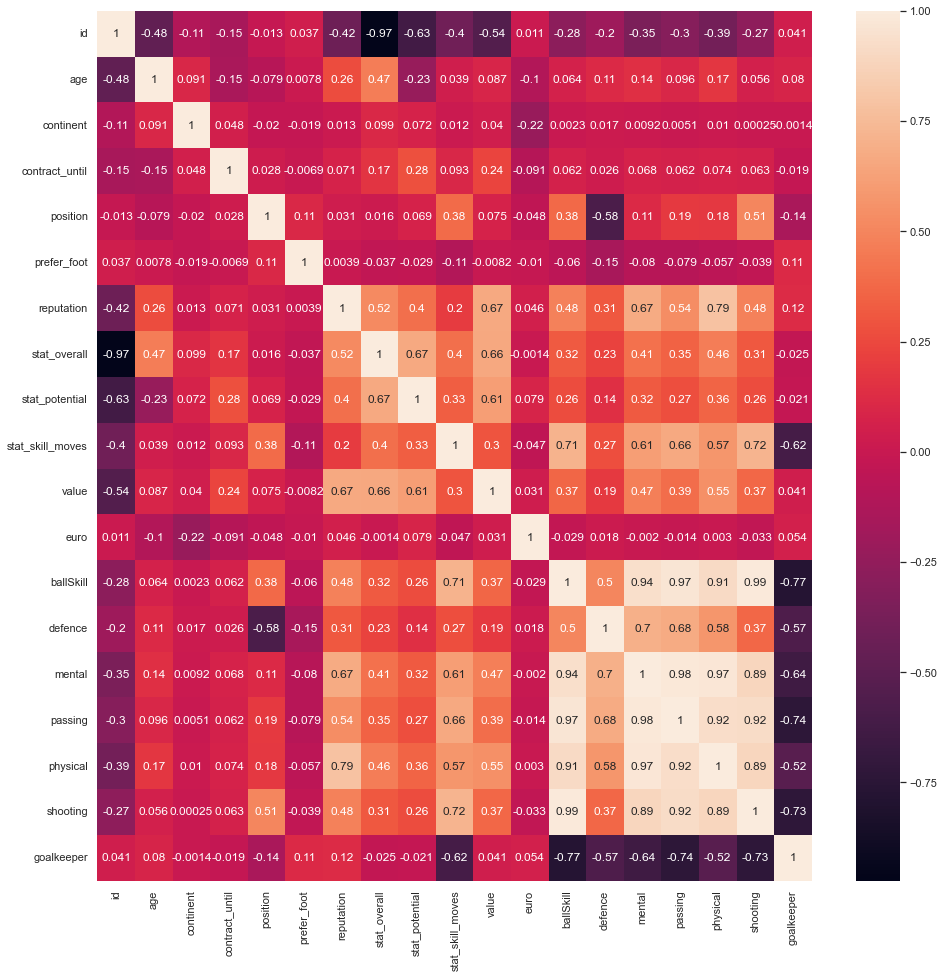

In [35]:
sns.set(rc={'figure.figsize': (16, 16)})
sns.heatmap(merge_df_fin.corr(), annot=True)

### 중간 점검

In [36]:
df_pre = merge_df_fin.drop({'id', 'name'}, axis=1)
df_pre

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,31,4,3.0,3,0,5.0,94,94,4.0,110500000.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
1,27,2,2.0,1,1,4.0,91,93,1.0,72000000.0,1,21.776934,17.466277,39.356788,28.033285,54.703483,19.882993,77.651737
2,31,4,3.0,3,1,5.0,91,91,3.0,80000000.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
3,32,2,2.0,0,1,4.0,91,91,3.0,51000000.0,1,68.864668,79.930221,70.336708,68.551941,79.936764,54.879951,13.014133
4,25,2,3.0,1,1,3.0,90,93,1.0,68000000.0,1,18.147445,14.555231,32.797324,23.361071,45.586236,16.569161,64.709781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,0,1.0,2,1,1.0,48,63,3.0,60000.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
8928,19,2,2.0,0,1,1.0,47,59,2.0,40000.0,1,34.432334,39.965111,35.168354,34.275971,39.968382,27.439975,6.507066
8929,18,4,3.0,0,1,1.0,47,64,2.0,50000.0,0,34.432334,39.965111,35.168354,34.275971,39.968382,27.439975,6.507066
8930,18,2,3.0,1,1,1.0,47,65,1.0,50000.0,1,10.888467,8.733139,19.678394,14.016642,27.351741,9.941496,38.825869


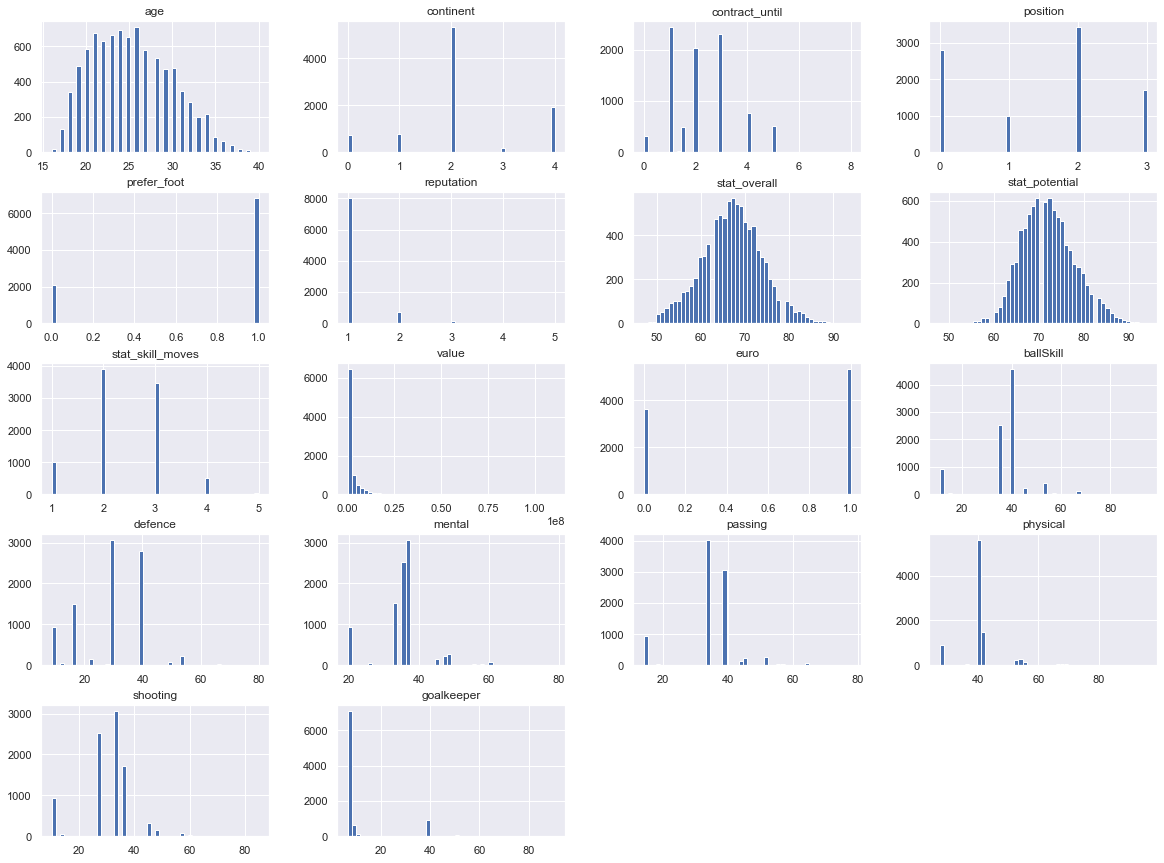

In [37]:
df_pre.hist(bins=50, figsize=(20, 15))
plt.show()

## 기본 데이터 모델링

In [76]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

In [77]:
df_train = merge_df_fin
df_test = merge_df_fin_test

In [78]:
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,L. Messi,31,4,3.0,3,0,5.0,94,94,4.0,110500000.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
1,3,D. Gea,27,2,2.0,1,1,4.0,91,93,1.0,72000000.0,1,21.776934,17.466277,39.356788,28.033285,54.703483,19.882993,77.651737
2,7,L. Suárez,31,4,3.0,3,1,5.0,91,91,3.0,80000000.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
3,8,S. Ramos,32,2,2.0,0,1,4.0,91,91,3.0,51000000.0,1,68.864668,79.930221,70.336708,68.551941,79.936764,54.879951,13.014133
4,9,J. Oblak,25,2,3.0,1,1,3.0,90,93,1.0,68000000.0,1,18.147445,14.555231,32.797324,23.361071,45.586236,16.569161,64.709781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,0,1.0,2,1,1.0,48,63,3.0,60000.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
8928,16936,C. Ehlich,19,2,2.0,0,1,1.0,47,59,2.0,40000.0,1,34.432334,39.965111,35.168354,34.275971,39.968382,27.439975,6.507066
8929,16941,N. Fuentes,18,4,3.0,0,1,1.0,47,64,2.0,50000.0,0,34.432334,39.965111,35.168354,34.275971,39.968382,27.439975,6.507066
8930,16942,J. Milli,18,2,3.0,1,1,1.0,47,65,1.0,50000.0,1,10.888467,8.733139,19.678394,14.016642,27.351741,9.941496,38.825869


In [79]:
df_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,euro,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,1,C. Ronaldo,33,2,4.0,3,1,5.0,94,94,5.0,1,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
1,2,N. Jr,26,4,4.0,3,1,5.0,92,93,5.0,0,94.731132,38.393139,78.834248,77.790852,96.007547,85.067110,14.994408
2,4,K. De Bruyne,27,2,5.0,2,1,4.0,91,92,4.0,1,81.233707,59.474139,73.004644,76.880064,81.917946,67.938831,12.911865
3,5,E. Hazard,27,2,2.0,3,1,4.0,91,91,4.0,1,81.198113,32.908405,67.572213,66.677873,82.292183,72.914666,12.852350
4,6,L. Modrić,32,2,2.0,2,1,4.0,91,91,4.0,1,81.233707,59.474139,73.004644,76.880064,81.917946,67.938831,12.911865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,1,3.0,2,1,1.0,48,63,2.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
3824,16929,L. Wahlstedt,18,2,0.0,1,1,1.0,48,65,1.0,1,10.888467,8.733139,19.678394,14.016642,27.351741,9.941496,38.825869
3825,16932,Y. Góez,18,4,3.0,2,1,1.0,48,65,2.0,0,40.616853,29.737070,36.502322,38.440032,40.958973,33.969416,6.455933
3826,16937,A. Kaltner,18,2,2.0,3,1,1.0,47,61,2.0,1,40.599057,16.454202,33.786106,33.338937,41.146092,36.457333,6.426175


In [80]:
df_train.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value', 'euro', 'ballSkill', 'defence', 'mental',
       'passing', 'physical', 'shooting', 'goalkeeper'],
      dtype='object')

In [81]:
feature = [
    'age', 'continent', 'contract_until', 'position', 'prefer_foot',
    'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves', 'euro',
    'ballSkill', 'defence', 'mental', 'passing', 'physical', 'shooting',
    'goalkeeper'
]
x_train = df_train[feature]
y_train = np.log1p(df_train['value'])
x_test = df_test[feature]

### RandomForestRegresssor & Bayesian

In [100]:
rf_parameter_bounds = {'n_estimators': (10, 800), 'max_depth': (3, 10)}


def rf_opt(n_estimators, max_depth):

    rf_params = {
        'n_estimators': int(round(n_estimators)),
        'max_depth': int(round(max_depth)),
        'n_jobs': -1,
        'random_state': 77
    }

    rf = RandomForestRegressor(**rf_params)

    kf = KFold(n_splits=10, shuffle=True, random_state=50)

    score = cross_val_score(rf,
                            x_train,
                            y_train,
                            scoring='neg_mean_squared_error',
                            cv=kf,
                            n_jobs=-1)

    return np.mean(score)


BO_rf = BayesianOptimization(f=rf_opt,
                             pbounds=rf_parameter_bounds,
                             random_state=77)

In [101]:
BO_rf.maximize(init_points = 50, n_iter = 30)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        | -0.011    |  9.434    |  517.3    |
|  2        | -0.01466  |  8.276    |  120.1    |
|  3        | -0.09998  |  3.611    |  632.5    |
|  4        | -0.05728  |  5.283    |  437.4    |
|  5        | -0.0573   |  4.682    |  440.9    |
|  6        | -0.03555  |  5.804    |  575.0    |
|  7        | -0.01101  |  8.857    |  474.9    |
|  8        | -0.05744  |  5.073    |  232.0    |
|  9        | -0.01454  |  7.939    |  343.9    |
|  10       | -0.1811   |  3.401    |  600.2    |
|  11       | -0.03572  |  6.166    |  148.9    |
|  12       | -0.1812   |  3.346    |  241.1    |
|  13       | -0.1811   |  3.468    |  603.4    |
|  14       | -0.181    |  3.446    |  351.2    |
|  15       | -0.03571  |  5.549    |  130.1    |
|  16       | -0.0222   |  6.827    |  360.2    |
|  17       | -0.1811   |  3.252    |  660.1    |
|  18       | -0.05744  |  4.913    |  143.5    |


In [102]:
BO_rf.max

{'target': -0.009190026346254414,
 'params': {'max_depth': 10.0, 'n_estimators': 623.9891561287585}}

In [103]:
model_rf = RandomForestRegressor(n_estimators=623, max_depth=10)

In [104]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=623)

In [105]:
pred_rf = np.expm1(model_rf.predict(x_test))
pred_rf

array([5.34596750e+07, 8.34195246e+07, 6.32484346e+07, ...,
       5.93770742e+04, 4.94326120e+04, 5.09038896e+04])

In [123]:
submission['value'] = pred_rf
submission.to_csv('submit_model_rf.csv',index = False)

In [145]:
joblib.dump(model_rf, './models/rf_model.pkl')

['./models/rf_model.pkl']

### GradientBoostingRegressor & Bayesian

In [106]:
gb_parameter_bounds = {
    'max_depth': (3, 10),
    'n_estimators': (100, 800),
    'learning_rate': (0.0005, 0.25),
}


def gb_opt(n_estimators, max_depth, learning_rate):

    gb_params = {
        'n_estimators': int(round(n_estimators)),
        'max_depth': int(round(max_depth)),
        'random_state': 77,
        'learning_rate': learning_rate
    }

    gb = GradientBoostingRegressor(**gb_params)

    kf = KFold(n_splits=10, shuffle=True, random_state=50)

    score = cross_val_score(gb,
                            x_train,
                            y_train,
                            scoring='neg_mean_squared_error',
                            cv=kf,
                            n_jobs=-1)

    return np.mean(score)


BO_gb = BayesianOptimization(f=gb_opt,
                             pbounds=gb_parameter_bounds,
                             random_state=77)

In [107]:
BO_gb.maximize(init_points = 50, n_iter = 50)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        | -0.007242 |  0.2298   |  7.495    |  627.6    |
|  2        | -0.005155 |  0.03526  |  3.611    |  651.6    |
|  3        | -0.006165 |  0.08187  |  6.787    |  268.2    |
|  4        | -0.005993 |  0.1366   |  5.804    |  600.6    |
|  5        | -0.006735 |  0.2093   |  7.119    |  307.3    |
|  6        | -0.007047 |  0.07061  |  7.939    |  395.8    |
|  7        | -0.006861 |  0.0148   |  8.229    |  416.6    |
|  8        | -0.007302 |  0.04436  |  3.346    |  304.7    |
|  9        | -0.02164  |  0.01717  |  8.258    |  144.6    |
|  10       | -0.005627 |  0.1083   |  5.549    |  206.4    |
|  11       | -0.005755 |  0.1369   |  6.103    |  125.2    |
|  12       | -0.004935 |  0.2058   |  4.913    |  218.3    |
|  13       | -0.004743 |  0.1613   |  3.753    |  347.3    |
|  14       | -0.005759 |  0.09673  |  6.119    |  783.9    |
|  15   

|  80       | -0.004498 |  0.1311   |  3.566    |  623.3    |
|  81       | -0.00757  |  0.1331   |  8.348    |  584.7    |
|  82       | -0.009542 |  0.22     |  9.96     |  219.2    |
|  83       | -0.00671  |  0.0869   |  3.218    |  223.9    |
|  84       | -0.004495 |  0.2098   |  3.344    |  658.1    |
|  85       | -0.007073 |  0.05299  |  8.33     |  661.4    |
|  86       | -0.00875  |  0.2296   |  8.674    |  358.6    |
|  87       | -0.005522 |  0.05769  |  3.257    |  581.7    |
|  88       | -0.004894 |  0.2053   |  4.656    |  327.3    |
|  89       | -0.004758 |  0.25     |  3.647    |  575.7    |
|  90       | -0.007435 |  0.137    |  8.416    |  492.1    |
|  91       | -0.005124 |  0.1395   |  3.191    |  361.5    |
|  92       | -0.004691 |  0.08605  |  4.939    |  368.0    |
|  93       | -0.008494 |  0.2262   |  9.311    |  363.9    |
|  94       | -0.009228 |  0.1407   |  9.696    |  370.3    |
|  95       | -0.007631 |  0.01122  |  8.557    |  572.4    |
|  96   

In [108]:
BO_gb.max

{'target': -0.004443161626149082,
 'params': {'learning_rate': 0.15808707447182987,
  'max_depth': 3.525424541720925,
  'n_estimators': 617.4125086862812}}

In [109]:
model_gb = GradientBoostingRegressor(n_estimators=617, max_depth=3, learning_rate=0.15)

In [110]:
model_gb.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.15, n_estimators=617)

In [112]:
pred_gb = np.expm1(model_gb.predict(x_test))
pred_gb

array([7.20626005e+07, 1.05372884e+08, 8.73002466e+07, ...,
       6.06590042e+04, 5.14042910e+04, 5.16027295e+04])

In [146]:
submission['value'] = pred_gb
submission.to_csv('submit_model_gb.csv',index = False)

In [146]:
joblib.dump(model_gb, './models/gb_model.pkl')

['./models/gb_model.pkl']

### LGBMRegressor

In [113]:
lgbm_parameter_bounds = {
    'max_depth': (3, 20),
    'n_estimators': (100, 800),
    'learning_rate': (0.0005, 0.25),
}


def lgbm_opt(n_estimators, max_depth, learning_rate):

    lgbm_params = {
        'n_estimators': int(round(n_estimators)),
        'max_depth': int(round(max_depth)),
        'random_state': 22,
        'learning_rate': learning_rate
    }

    lgbm = LGBMRegressor(**lgbm_params)

    kf = KFold(n_splits=10, shuffle=True, random_state=50)

    score = cross_val_score(lgbm,
                            x_train,
                            y_train,
                            scoring='neg_mean_squared_error',
                            cv=kf,
                            n_jobs=-1)

    return np.mean(score)


BO_lgbm = BayesianOptimization(f=lgbm_opt,
                             pbounds=lgbm_parameter_bounds,
                             random_state=0)

In [114]:
BO_lgbm.maximize(init_points = 50, n_iter = 50)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        | -0.004966 |  0.1374   |  15.16    |  521.9    |
|  2        | -0.004946 |  0.1364   |  10.2     |  552.1    |
|  3        | -0.005049 |  0.1097   |  18.16    |  774.6    |
|  4        | -0.005074 |  0.09617  |  16.46    |  470.2    |
|  5        | -0.00535  |  0.1422   |  18.74    |  149.7    |
|  6        | -0.007529 |  0.02224  |  3.344    |  682.8    |
|  7        | -0.005396 |  0.1947   |  17.79    |  785.0    |
|  8        | -0.005317 |  0.1999   |  10.85    |  646.4    |
|  9        | -0.007021 |  0.03001  |  13.88    |  200.3    |
|  10       | -0.005502 |  0.2362   |  11.87    |  390.3    |
|  11       | -0.005116 |  0.06651  |  16.16    |  419.3    |
|  12       | -0.005272 |  0.1423   |  3.319    |  532.3    |
|  13       | -0.005187 |  0.1532   |  13.49    |  760.6    |
|  14       | -0.005111 |  0.1706   |  9.112    |  405.9    |
|  15   

|  81       | -0.005518 |  0.25     |  20.0     |  738.1    |
|  82       | -1.037    |  0.0005   |  3.0      |  741.1    |
|  83       | -0.005205 |  0.25     |  20.0     |  358.7    |
|  84       | -0.009087 |  0.01682  |  3.287    |  513.3    |
|  85       | -0.005245 |  0.1883   |  19.86    |  642.9    |
|  86       | -1.005    |  0.0005   |  3.0      |  778.2    |
|  87       | -1.561    |  0.0005   |  3.0      |  262.5    |
|  88       | -1.427    |  0.0005   |  14.53    |  334.1    |
|  89       | -1.495    |  0.0005   |  3.0      |  311.6    |
|  90       | -0.005278 |  0.25     |  14.05    |  439.1    |
|  91       | -0.004882 |  0.2404   |  3.177    |  618.7    |
|  92       | -0.006298 |  0.01894  |  8.529    |  454.4    |
|  93       | -0.005473 |  0.08125  |  15.08    |  214.0    |
|  94       | -1.578    |  0.000605 |  3.475    |  206.0    |
|  95       | -0.005512 |  0.2206   |  11.37    |  636.6    |
|  96       | -0.005496 |  0.1004   |  19.78    |  160.9    |
|  97   

In [115]:
BO_lgbm.max

{'target': -0.004876682600964568,
 'params': {'learning_rate': 0.1745589833838526,
  'max_depth': 4.023833017697587,
  'n_estimators': 566.7367008119674}}

In [116]:
model_lgbm = LGBMRegressor(n_estimators=567, max_depth=4, learning_rate=0.174)

In [117]:
model_lgbm.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.174, max_depth=4, n_estimators=567)

In [119]:
pred_lgbm = np.expm1(model_lgbm.predict(x_test))
pred_lgbm

array([5.61488062e+07, 8.92232154e+07, 8.02095620e+07, ...,
       5.91989403e+04, 4.99245749e+04, 4.79547128e+04])

In [153]:
submission['value'] = pred_lgbm
submission.to_csv('submit_model_lgbm.csv',index = False)

In [147]:
joblib.dump(model_lgbm, './models/lgbm_model.pkl')

['./models/lgbm_model.pkl']

### XGBRegressor & Bayesian

In [120]:
xgb_parameter_bounds = {
    'max_depth': (3, 20),
    'n_estimators': (100, 800),
    'learning_rate': (0.0005, 0.25),
}


def xgb_opt(n_estimators, max_depth, learning_rate):

    xgb_params = {
        'n_estimators': int(round(n_estimators)),
        'max_depth': int(round(max_depth)),
        'random_state': 77,
        'learning_rate': learning_rate
    }

    xgb = XGBRegressor(**xgb_params)

    kf = KFold(n_splits=10, shuffle=True, random_state=50)

    score = cross_val_score(xgb,
                            x_train,
                            y_train,
                            scoring='neg_mean_squared_error',
                            cv=kf,
                            n_jobs=-1)

    return np.mean(score)


BO_xgb = BayesianOptimization(f=lgbm_opt,
                             pbounds=xgb_parameter_bounds,
                             random_state=77)

In [121]:
BO_xgb.maximize(init_points = 50, n_iter = 50)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        | -0.005456 |  0.2298   |  13.92    |  627.6    |
|  2        | -0.005924 |  0.03526  |  4.484    |  651.6    |
|  3        | -0.005312 |  0.08187  |  12.2     |  268.2    |
|  4        | -0.004984 |  0.1366   |  9.809    |  600.6    |
|  5        | -0.005187 |  0.2093   |  13.0     |  307.3    |
|  6        | -0.005116 |  0.07061  |  15.0     |  395.8    |
|  7        | -0.006986 |  0.0148   |  15.7     |  416.6    |
|  8        | -0.006574 |  0.04436  |  3.839    |  304.7    |
|  9        | -0.02961  |  0.01717  |  15.77    |  144.6    |
|  10       | -0.005429 |  0.1083   |  9.191    |  206.4    |
|  11       | -0.005737 |  0.1369   |  10.54    |  125.2    |
|  12       | -0.005266 |  0.2058   |  7.646    |  218.3    |
|  13       | -0.005193 |  0.1613   |  4.828    |  347.3    |
|  14       | -0.005008 |  0.09673  |  10.57    |  783.9    |
|  15   

|  80       | -0.005133 |  0.1265   |  18.91    |  260.5    |
|  81       | -0.004855 |  0.1992   |  4.484    |  622.5    |
|  82       | -0.00496  |  0.2009   |  4.7      |  633.7    |
|  83       | -0.005258 |  0.2123   |  11.61    |  642.5    |
|  84       | -1.071    |  0.0005   |  20.0     |  636.3    |
|  85       | -0.004836 |  0.1271   |  3.915    |  642.8    |
|  86       | -0.02549  |  0.003417 |  11.76    |  771.3    |
|  87       | -0.006189 |  0.1058   |  8.461    |  112.4    |
|  88       | -0.005146 |  0.2168   |  17.61    |  348.9    |
|  89       | -0.005228 |  0.2269   |  11.06    |  359.6    |
|  90       | -0.005091 |  0.1753   |  19.82    |  368.6    |
|  91       | -1.773    |  0.0005   |  19.71    |  106.7    |
|  92       | -0.006896 |  0.25     |  3.0      |  117.8    |
|  93       | -0.2254   |  0.009036 |  19.78    |  128.9    |
|  94       | -0.005565 |  0.25     |  5.435    |  235.9    |
|  95       | -0.006369 |  0.03468  |  19.86    |  230.3    |
|  96   

In [122]:
BO_xgb.max

{'target': -0.004836363739604065,
 'params': {'learning_rate': 0.12705906132163317,
  'max_depth': 3.9145310388739496,
  'n_estimators': 642.8011898838519}}

In [123]:
model_xgb = XGBRegressor(learning_rate=0.127, max_depth=4, n_estimators=642)

In [124]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.127, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=642, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [125]:
pred_xgb = np.expm1(model_xgb.predict(x_test))
pred_xgb

array([5.7023960e+07, 9.6755632e+07, 8.2687688e+07, ..., 6.4654102e+04,
       5.4626973e+04, 5.2290379e+04], dtype=float32)

In [162]:
submission['value'] = pred_xgb
submission.to_csv('submit_model_xgb.csv',index = False)

In [148]:
joblib.dump(model_xgb, './models/xgb_model.pkl')

['./models/xgb_model.pkl']

### ExtraTreesRegressor & Bayesian

In [126]:
extra_parameter_bounds = {
    'max_depth': (3, 20),  # 범위 3~5
    'n_estimators': (100, 800)
}


def extra_opt(n_estimators, max_depth):

    extra_params = {
        'n_estimators': int(round(n_estimators)),
        'max_depth': int(round(max_depth)),
        'random_state': 77
    }

    extra = ExtraTreesRegressor(**extra_params)

    kf = KFold(n_splits=10, shuffle=True, random_state=50)

    score = cross_val_score(extra,
                            x_train,
                            y_train,
                            scoring='neg_mean_squared_error',
                            cv=kf,
                            n_jobs=-1)

    return np.mean(score)


BO_extra = BayesianOptimization(f=extra_opt,
                             pbounds=extra_parameter_bounds,
                             random_state=77)

In [127]:
BO_extra.maximize(init_points = 50, n_iter = 50)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        | -0.007488 |  18.62    |  549.5    |
|  2        | -0.007313 |  15.81    |  197.5    |
|  3        | -0.1421   |  4.484    |  651.6    |
|  4        | -0.01599  |  8.545    |  478.7    |
|  5        | -0.03814  |  7.084    |  481.8    |
|  6        | -0.01142  |  9.809    |  600.6    |
|  7        | -0.007283 |  17.22    |  511.9    |
|  8        | -0.02444  |  8.035    |  296.7    |
|  9        | -0.007045 |  15.0     |  395.8    |
|  10       | -0.1421   |  3.974    |  622.9    |
|  11       | -0.009073 |  10.69    |  223.0    |
|  12       | -0.1407   |  3.839    |  304.7    |
|  13       | -0.1421   |  4.136    |  625.8    |
|  14       | -0.1404   |  4.084    |  402.3    |
|  15       | -0.01618  |  9.191    |  206.4    |
|  16       | -0.00777  |  12.29    |  410.3    |
|  17       | -0.1415   |  3.613    |  676.0    |
|  18       | -0.02452  |  7.646    |  218.3    |


|  100      | -0.007538 |  19.9     |  177.0    |


In [128]:
BO_extra.max

{'target': -0.007022627115440156,
 'params': {'max_depth': 15.064960825939357,
  'n_estimators': 134.98348338778092}}

In [129]:
model_extra = ExtraTreesRegressor(max_depth=15, n_estimators=135)

In [130]:
model_extra.fit(x_train, y_train)

ExtraTreesRegressor(max_depth=15, n_estimators=135)

In [131]:
pred_extra = np.expm1(model_extra.predict(x_test))
pred_extra

array([8.10993173e+07, 8.88891619e+07, 6.17564326e+07, ...,
       5.79790470e+04, 5.28708117e+04, 5.29804571e+04])

In [170]:
submission['value'] = pred_extra
submission.to_csv('submit_model_extra.csv',index = False)

In [150]:
joblib.dump(model_extra, './models/extra_model.pkl')

['./models/extra_model.pkl']

### CatBoostRegressor

In [133]:
param_grid = {
    'depth': list(range(2, 13)),  #[2,3,4,5,6,7,8,9,10], 
    'learning_rate': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25]
}
rand_cat = RandomizedSearchCV(CatBoostRegressor(random_state=22),
                              param_distributions=param_grid,
                              cv=KFold(n_splits=10,
                                       shuffle=True,
                                       random_state=22),
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)
rand_cat.fit(x_train, y_train)

0:	learn: 1.2831671	total: 131ms	remaining: 2m 10s
1:	learn: 1.1827607	total: 132ms	remaining: 1m 5s
2:	learn: 1.0883782	total: 133ms	remaining: 44.2s
3:	learn: 1.0059985	total: 134ms	remaining: 33.3s
4:	learn: 0.9267556	total: 135ms	remaining: 26.8s
5:	learn: 0.8596191	total: 136ms	remaining: 22.5s
6:	learn: 0.7955415	total: 137ms	remaining: 19.4s
7:	learn: 0.7370619	total: 138ms	remaining: 17.1s
8:	learn: 0.6844740	total: 138ms	remaining: 15.2s
9:	learn: 0.6354325	total: 139ms	remaining: 13.8s
10:	learn: 0.5905268	total: 140ms	remaining: 12.6s
11:	learn: 0.5499128	total: 141ms	remaining: 11.6s
12:	learn: 0.5142184	total: 142ms	remaining: 10.8s
13:	learn: 0.4824947	total: 143ms	remaining: 10.1s
14:	learn: 0.4543960	total: 144ms	remaining: 9.44s
15:	learn: 0.4253443	total: 145ms	remaining: 8.89s
16:	learn: 0.3998802	total: 146ms	remaining: 8.41s
17:	learn: 0.3757434	total: 146ms	remaining: 7.99s
18:	learn: 0.3551623	total: 147ms	remaining: 7.6s
19:	learn: 0.3343774	total: 148ms	remaini

193:	learn: 0.0721579	total: 303ms	remaining: 1.26s
194:	learn: 0.0720996	total: 304ms	remaining: 1.25s
195:	learn: 0.0720640	total: 305ms	remaining: 1.25s
196:	learn: 0.0719681	total: 306ms	remaining: 1.25s
197:	learn: 0.0718374	total: 307ms	remaining: 1.24s
198:	learn: 0.0717493	total: 308ms	remaining: 1.24s
199:	learn: 0.0716860	total: 308ms	remaining: 1.23s
200:	learn: 0.0716468	total: 309ms	remaining: 1.23s
201:	learn: 0.0716079	total: 310ms	remaining: 1.23s
202:	learn: 0.0715401	total: 311ms	remaining: 1.22s
203:	learn: 0.0714915	total: 312ms	remaining: 1.22s
204:	learn: 0.0713798	total: 313ms	remaining: 1.21s
205:	learn: 0.0712979	total: 314ms	remaining: 1.21s
206:	learn: 0.0712050	total: 315ms	remaining: 1.21s
207:	learn: 0.0711607	total: 316ms	remaining: 1.2s
208:	learn: 0.0710914	total: 317ms	remaining: 1.2s
209:	learn: 0.0709211	total: 317ms	remaining: 1.19s
210:	learn: 0.0708258	total: 318ms	remaining: 1.19s
211:	learn: 0.0707825	total: 319ms	remaining: 1.19s
212:	learn: 0.

387:	learn: 0.0618912	total: 477ms	remaining: 753ms
388:	learn: 0.0618665	total: 479ms	remaining: 752ms
389:	learn: 0.0618542	total: 480ms	remaining: 750ms
390:	learn: 0.0618442	total: 480ms	remaining: 748ms
391:	learn: 0.0618155	total: 481ms	remaining: 747ms
392:	learn: 0.0617705	total: 482ms	remaining: 745ms
393:	learn: 0.0617450	total: 483ms	remaining: 743ms
394:	learn: 0.0617250	total: 484ms	remaining: 741ms
395:	learn: 0.0617027	total: 485ms	remaining: 740ms
396:	learn: 0.0616611	total: 486ms	remaining: 738ms
397:	learn: 0.0616552	total: 487ms	remaining: 736ms
398:	learn: 0.0616131	total: 488ms	remaining: 734ms
399:	learn: 0.0615679	total: 488ms	remaining: 733ms
400:	learn: 0.0615513	total: 489ms	remaining: 731ms
401:	learn: 0.0615346	total: 490ms	remaining: 729ms
402:	learn: 0.0614945	total: 491ms	remaining: 728ms
403:	learn: 0.0614395	total: 492ms	remaining: 726ms
404:	learn: 0.0613918	total: 493ms	remaining: 724ms
405:	learn: 0.0613725	total: 494ms	remaining: 723ms
406:	learn: 

580:	learn: 0.0575363	total: 652ms	remaining: 470ms
581:	learn: 0.0575206	total: 653ms	remaining: 469ms
582:	learn: 0.0574676	total: 653ms	remaining: 467ms
583:	learn: 0.0574470	total: 654ms	remaining: 466ms
584:	learn: 0.0574382	total: 655ms	remaining: 465ms
585:	learn: 0.0574214	total: 656ms	remaining: 464ms
586:	learn: 0.0574044	total: 657ms	remaining: 462ms
587:	learn: 0.0573633	total: 658ms	remaining: 461ms
588:	learn: 0.0573507	total: 659ms	remaining: 460ms
589:	learn: 0.0573398	total: 660ms	remaining: 458ms
590:	learn: 0.0573131	total: 661ms	remaining: 457ms
591:	learn: 0.0573081	total: 662ms	remaining: 456ms
592:	learn: 0.0572862	total: 663ms	remaining: 455ms
593:	learn: 0.0572732	total: 664ms	remaining: 454ms
594:	learn: 0.0572569	total: 665ms	remaining: 452ms
595:	learn: 0.0572369	total: 665ms	remaining: 451ms
596:	learn: 0.0572145	total: 666ms	remaining: 450ms
597:	learn: 0.0571980	total: 667ms	remaining: 448ms
598:	learn: 0.0571776	total: 668ms	remaining: 447ms
599:	learn: 

776:	learn: 0.0548739	total: 826ms	remaining: 237ms
777:	learn: 0.0548708	total: 827ms	remaining: 236ms
778:	learn: 0.0548545	total: 828ms	remaining: 235ms
779:	learn: 0.0548522	total: 829ms	remaining: 234ms
780:	learn: 0.0548495	total: 830ms	remaining: 233ms
781:	learn: 0.0548384	total: 831ms	remaining: 232ms
782:	learn: 0.0548364	total: 832ms	remaining: 231ms
783:	learn: 0.0548153	total: 833ms	remaining: 229ms
784:	learn: 0.0548078	total: 834ms	remaining: 228ms
785:	learn: 0.0548000	total: 835ms	remaining: 227ms
786:	learn: 0.0547858	total: 836ms	remaining: 226ms
787:	learn: 0.0547847	total: 836ms	remaining: 225ms
788:	learn: 0.0547765	total: 837ms	remaining: 224ms
789:	learn: 0.0547707	total: 838ms	remaining: 223ms
790:	learn: 0.0547555	total: 839ms	remaining: 222ms
791:	learn: 0.0547378	total: 840ms	remaining: 221ms
792:	learn: 0.0547286	total: 841ms	remaining: 220ms
793:	learn: 0.0547228	total: 842ms	remaining: 218ms
794:	learn: 0.0547130	total: 843ms	remaining: 217ms
795:	learn: 

972:	learn: 0.0531575	total: 1s	remaining: 27.8ms
973:	learn: 0.0531529	total: 1s	remaining: 26.7ms
974:	learn: 0.0531461	total: 1s	remaining: 25.7ms
975:	learn: 0.0531241	total: 1s	remaining: 24.7ms
976:	learn: 0.0531176	total: 1s	remaining: 23.6ms
977:	learn: 0.0531054	total: 1s	remaining: 22.6ms
978:	learn: 0.0531012	total: 1s	remaining: 21.6ms
979:	learn: 0.0530971	total: 1.01s	remaining: 20.5ms
980:	learn: 0.0530857	total: 1.01s	remaining: 19.5ms
981:	learn: 0.0530827	total: 1.01s	remaining: 18.5ms
982:	learn: 0.0530731	total: 1.01s	remaining: 17.5ms
983:	learn: 0.0530701	total: 1.01s	remaining: 16.4ms
984:	learn: 0.0530572	total: 1.01s	remaining: 15.4ms
985:	learn: 0.0530483	total: 1.01s	remaining: 14.4ms
986:	learn: 0.0530452	total: 1.01s	remaining: 13.3ms
987:	learn: 0.0530402	total: 1.01s	remaining: 12.3ms
988:	learn: 0.0530384	total: 1.01s	remaining: 11.3ms
989:	learn: 0.0530305	total: 1.01s	remaining: 10.3ms
990:	learn: 0.0530190	total: 1.02s	remaining: 9.23ms
991:	learn: 0.

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=22, shuffle=True),
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000024F4AD4ACD0>,
                   n_jobs=-1,
                   param_distributions={'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12],
                                        'learning_rate': [0.0005, 0.001, 0.005,
                                                          0.01, 0.05, 0.1, 0.2,
                                                          0.25]},
                   scoring='neg_mean_squared_error')

In [134]:
rand_cat.best_params_

{'learning_rate': 0.1, 'depth': 4}

In [135]:
model_cat = CatBoostRegressor(depth=4,
                              learning_rate=0.1,
                              eval_metric='RMSE',
                              verbose=0,
                              random_seed=22)

In [137]:
model_cat.fit(x_train, y_train)
pred_cat =  np.expm1(model_cat.predict(x_test))
pred_cat

array([6.99693028e+07, 1.09230835e+08, 8.99909053e+07, ...,
       6.18803158e+04, 5.11305908e+04, 5.01552579e+04])

In [177]:
submission['value'] = pred_cat
submission.to_csv('submit_model_cat.csv', index=False)

In [149]:
joblib.dump(model_cat, './models/cat_model.pkl')

['./models/cat_model.pkl']

## 모델 결과값 평균

In [138]:
submission_fin = pd.read_csv('./data/submission.csv')

In [139]:
submission_fin['value'] = (pred_cat + pred_extra + pred_gb + pred_lgbm + pred_rf + pred_xgb) / 6
submission_fin

,id,value
0,1,6.496061e+07
1,2,9.548188e+07
2,4,7.753221e+07
3,5,8.133107e+07
4,6,6.179776e+07
...,...,...
3823,16924,5.870585e+04
3824,16929,5.077583e+04
3825,16932,6.062475e+04
3826,16937,5.156498e+04


In [141]:
q1 = submission_fin['value'].quantile(0.004)
q2 = submission_fin['value'].quantile(0.99)

submission_fin['value'] = submission_fin['value'].apply(lambda x: x if x > q1 else x * 0.9)
submission_fin['value'] = submission_fin['value'].apply(lambda x: x if x < q2 else x * 1.1)

In [142]:
submission_fin

,id,value
0,1,7.145667e+07
1,2,1.050301e+08
2,4,8.528543e+07
3,5,8.946418e+07
4,6,6.797754e+07
...,...,...
3823,16924,5.870585e+04
3824,16929,5.077583e+04
3825,16932,6.062475e+04
3826,16937,5.156498e+04


In [143]:
submission_fin.to_csv('submit_fin_3.csv', index=False)